In [4]:
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 4.1 MB/s eta 0:00:00


In [5]:
import pandas as pd
from matplotlib import pyplot as plt

In [6]:
!wget https://archive.ics.uci.edu/static/public/352/online+retail.zip

--2025-02-20 06:43:52--  https://archive.ics.uci.edu/static/public/352/online+retail.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘online+retail.zip’

online+retail.zip       [          <=>       ]  22.62M   500KB/s    in 30s     

2025-02-20 06:44:23 (769 KB/s) - ‘online+retail.zip’ saved [23715478]



In [7]:
import time
stime = time.time()

In [8]:
!unzip online+retail.zip

Archive:  online+retail.zip
 extracting: Online Retail.xlsx      


In [9]:
df1 = pd.read_excel('Online Retail.xlsx',dtype={'InvoiceNo':'string', 'StockCode':'string', 'Description':'string', 'Country':'string'})
df1 = pd.concat([df1]*60)
df1.shape


(32514540, 8)

In [10]:
df1.shape

(32514540, 8)

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32514540 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Dtype         
---  ------       -----         
 0   InvoiceNo    string        
 1   StockCode    string        
 2   Description  string        
 3   Quantity     int64         
 4   InvoiceDate  datetime64[ns]
 5   UnitPrice    float64       
 6   CustomerID   float64       
 7   Country      string        
dtypes: datetime64[ns](1), float64(2), int64(1), string(4)
memory usage: 2.2 GB


#### Data Cleaning : Handling Missing Values

In [12]:
df1.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,87240
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,8104800
Country,0


In [13]:
df1[df1.Description.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,<NA>,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,<NA>,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,<NA>,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,<NA>,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,<NA>,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,<NA>,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [14]:
df1[df1.StockCode == '22139'].Description.mode()

,Description
0,RETROSPOT TEA SET CERAMIC 11 PC


In [15]:
most_freq = df1[["StockCode","Description"]].value_counts().reset_index()
most_freq

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,138120
1,22423,REGENCY CAKESTAND 3 TIER,132000
2,85099B,JUMBO BAG RED RETROSPOT,129540
3,47566,PARTY BUNTING,103620
4,20725,LUNCH BAG RED RETROSPOT,98280
...,...,...,...
4787,35833P,check,60
4788,21410,COUNTRY COTTAGE DOORSTOP GREEN,60
4789,21412,VINTAGE GOLD TINSEL REEL,60
4790,21414,SCALLOP SHELL SOAP DISH,60


In [16]:
most_freq[most_freq.StockCode == '85123A'].head(1)

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,138120


In [17]:
most_freq = most_freq.groupby('StockCode').head(1)
most_freq

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,138120
1,22423,REGENCY CAKESTAND 3 TIER,132000
2,85099B,JUMBO BAG RED RETROSPOT,129540
3,47566,PARTY BUNTING,103620
4,20725,LUNCH BAG RED RETROSPOT,98280
...,...,...,...
4784,35832,WOOLLY HAT SOCK GLOVE ADVENT STRING,60
4785,35833G,4 GOLD FLOCK CHRISTMAS BALLS,60
4788,21410,COUNTRY COTTAGE DOORSTOP GREEN,60
4789,21412,VINTAGE GOLD TINSEL REEL,60


In [18]:
most_freq.columns = ["StockCode", "freq_Description", "count"]
df2 = df1.merge(most_freq, on='StockCode', how='left')
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_Description,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,138120.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,19680.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,17580.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,28380.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,26940.0


In [19]:
df2['Description'] = df2['freq_Description']
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_Description,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,138120.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,19680.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,17580.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,28380.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,26940.0


In [20]:
df2.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,6720
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,8104800
Country,0
freq_Description,6720
count,6720


In [21]:
df2.dropna(subset=['Description'], inplace=True)
df2.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,8098080
Country,0
freq_Description,0
count,0


In [22]:
df2.drop(columns=['freq_Description', 'count'], inplace=True)
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [23]:
df2.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,3.250782e+07,32507820,3.250782e+07,2.440974e+07
mean,9.555919e+00,2011-07-04 14:06:48.671256832,4.612067e+00,1.528769e+04
min,-8.099500e+04,2010-12-01 08:26:00,-1.106206e+04,1.234600e+04
25%,1.000000e+00,2011-03-28 11:36:00,1.250000e+00,1.395300e+04
50%,3.000000e+00,2011-07-20 08:59:00,2.080000e+00,1.515200e+04
75%,1.000000e+01,2011-10-19 11:41:00,4.130000e+00,1.679100e+04
max,8.099500e+04,2011-12-09 12:50:00,3.897000e+04,1.828700e+04
std,2.181032e+02,NaN,9.676974e+01,1.713598e+03


In [24]:
df2[df2.Quantity <0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
32513080,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
32514172,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
32514346,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
32514347,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [25]:
df3 = df2[(df2.UnitPrice >0) & (df2.Quantity >0)]
df3.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,3.180624e+07,31806240,3.180624e+07,2.387304e+07
mean,1.054204e+01,2011-07-04 20:16:05.225086720,3.907625e+00,1.529442e+04
min,1.000000e+00,2010-12-01 08:26:00,1.000000e-03,1.234600e+04
25%,1.000000e+00,2011-03-28 12:22:00,1.250000e+00,1.396900e+04
50%,3.000000e+00,2011-07-20 12:58:00,2.080000e+00,1.515900e+04
75%,1.000000e+01,2011-10-19 12:39:00,4.130000e+00,1.679500e+04
max,8.099500e+04,2011-12-09 12:50:00,1.354133e+04,1.828700e+04
std,1.555240e+02,NaN,3.591565e+01,1.713139e+03


In [26]:
df3.Quantity.quantile(0.9999)

1440.0

In [27]:
df3[df2.Quantity>1500].head()

<ipython-input-27-91d1496c8fed>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3[df2.Quantity>1500].head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4850,536809,84950,ASSORTED COLOUR T-LIGHT HOLDER,1824,2010-12-02 16:48:00,0.55,15299.0,United Kingdom
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754.0,United Kingdom
25920,538420,17096,ASSORTED LAQUERED INCENSE HOLDERS,1728,2010-12-12 12:03:00,0.17,12875.0,United Kingdom
32671,539101,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,2400,2010-12-16 10:35:00,0.94,16029.0,United Kingdom
52709,540815,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,2011-01-11 12:55:00,2.55,15749.0,United Kingdom


#### Feature Engineering : Create a new Column


In [28]:
df4 = df3.copy()
df4['TotalPrice'] = df4['Quantity'] * df4['UnitPrice']
df4.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [29]:
df4['Month'] = df4["InvoiceDate"].dt.month
df4.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12


#### Visualization & EDA

##### Plot Monthly Sales


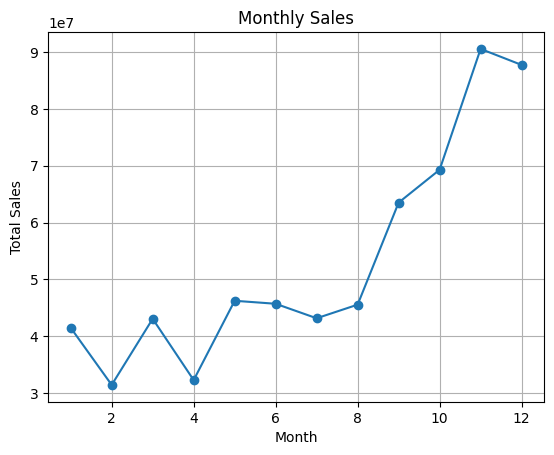

In [30]:
monthly_sales = df4.groupby('Month')['TotalPrice'].sum()
monthly_sales.plot(kind='line', title = "Monthly Sales",marker = "o")
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid()
plt.show()


**Insights**

Total sales started rising up in August having a peek in November. This is likely due to the holiday season at the end of the year.

##### 2. Top 5 Countries

In [31]:
# Top 5 Countries by Total Sales
top_5_countries = df4.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(5)
top_5_countries


,TotalPrice
Country,
United Kingdom,5.415133e+08
Netherlands,1.712678e+07
EIRE,1.700724e+07
Germany,1.373203e+07
France,1.258291e+07


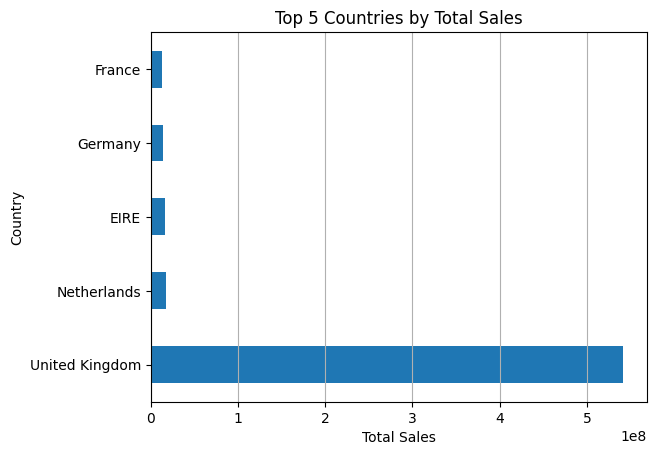

In [32]:
top_5_countries.plot(kind='barh', title='Top 5 Countries by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.grid(axis='x')
plt.show()

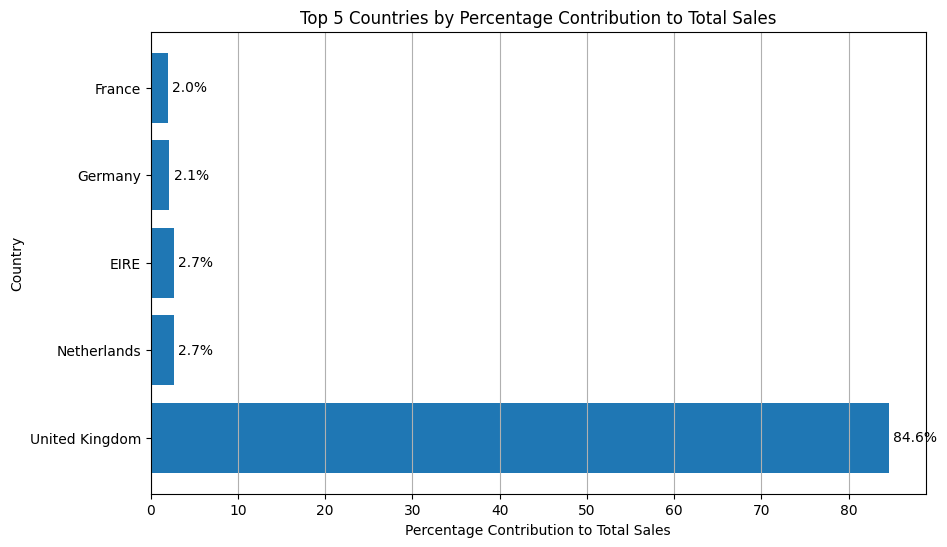

In [33]:
# prompt: Plot same chart as above but this time use percentae contribution. Show % on the bar

import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import pyplot as plt

# Assuming df4 is already defined from the previous code
country_wise_sales = df4.groupby('Country')['TotalPrice'].sum()
total_sales = country_wise_sales.sum()

top_5_countries = country_wise_sales.sort_values(ascending=False).head(5)
percentage_contributions = (top_5_countries / total_sales) * 100


plt.figure(figsize=(10, 6))  # Adjust figure size as needed
bars = plt.barh(percentage_contributions.index, percentage_contributions.values)

# Add percentage labels on the bars
for bar, percentage in zip(bars, percentage_contributions):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, f'{percentage:.1f}%', va='center', ha='left')

plt.xlabel('Percentage Contribution to Total Sales')
plt.ylabel('Country')
plt.title('Top 5 Countries by Percentage Contribution to Total Sales')
plt.grid(axis='x')
plt.show()


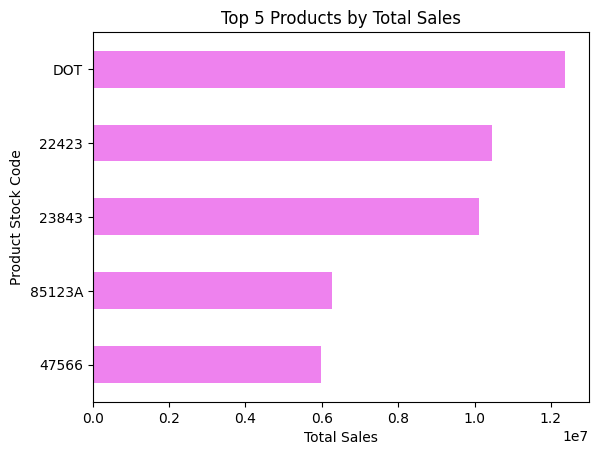

In [34]:
product_wise_sales = df4.groupby('StockCode')['TotalPrice'].sum()

top_5_products = product_wise_sales.sort_values(ascending=False).head(5)
top_5_products.plot(kind='barh',color ='violet')
plt.xlabel('Total Sales')
plt.ylabel('Product Stock Code')
plt.title('Top 5 Products by Total Sales')
plt.gca().invert_yaxis()
plt.show()

In [35]:
df4[df4.StockCode == 'DOT']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month
1814,536544,DOT,DOTCOM POSTAGE,1,2010-12-01 14:32:00,569.77,NaN,United Kingdom,569.77,12
3041,536592,DOT,DOTCOM POSTAGE,1,2010-12-01 17:06:00,607.49,NaN,United Kingdom,607.49,12
5450,536862,DOT,DOTCOM POSTAGE,1,2010-12-03 11:13:00,254.43,NaN,United Kingdom,254.43,12
5545,536864,DOT,DOTCOM POSTAGE,1,2010-12-03 11:27:00,121.06,NaN,United Kingdom,121.06,12
5685,536865,DOT,DOTCOM POSTAGE,1,2010-12-03 11:28:00,498.47,NaN,United Kingdom,498.47,12
...,...,...,...,...,...,...,...,...,...,...
32509465,581219,DOT,DOTCOM POSTAGE,1,2011-12-08 09:28:00,1008.96,NaN,United Kingdom,1008.96,12
32509885,581238,DOT,DOTCOM POSTAGE,1,2011-12-08 10:53:00,1683.75,NaN,United Kingdom,1683.75,12
32511999,581439,DOT,DOTCOM POSTAGE,1,2011-12-08 16:30:00,938.59,NaN,United Kingdom,938.59,12
32513539,581492,DOT,DOTCOM POSTAGE,1,2011-12-09 10:03:00,933.17,NaN,United Kingdom,933.17,12


**Top 5 Selling Products:**

In [36]:
for stock_code in top_5_products.index:
    product_name = df4[df4['StockCode'] == stock_code]['Description'].iloc[0]
    print(f"Stock Code: {stock_code}, Product Name: {product_name}")

Stock Code: DOT, Product Name: DOTCOM POSTAGE
Stock Code: 22423, Product Name: REGENCY CAKESTAND 3 TIER
Stock Code: 23843, Product Name: PAPER CRAFT , LITTLE BIRDIE
Stock Code: 85123A, Product Name: WHITE HANGING HEART T-LIGHT HOLDER
Stock Code: 47566, Product Name: PARTY BUNTING


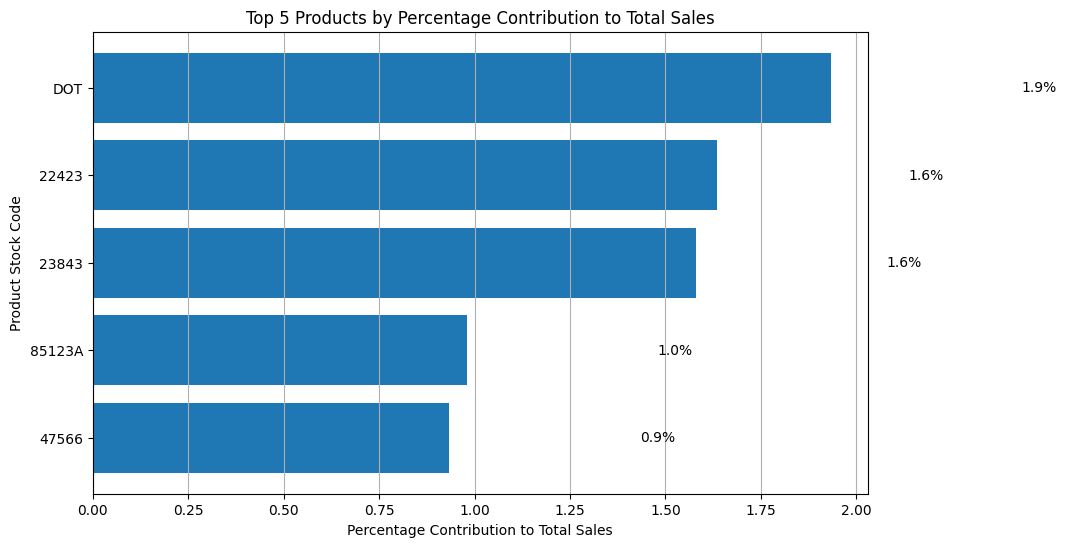

In [37]:

# Assuming df4 is already defined from the previous code
product_wise_sales = df4.groupby('StockCode')['TotalPrice'].sum()
total_sales = product_wise_sales.sum()

top_5_products = product_wise_sales.sort_values(ascending=False).head(5)
percentage_contributions = (top_5_products / total_sales) * 100

plt.figure(figsize=(10, 6))
bars = plt.barh(top_5_products.index, percentage_contributions.values)

# Add percentage labels on the bars
for bar, percentage in zip(bars, percentage_contributions):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, f'{percentage:.1f}%', va='center', ha='left')

plt.xlabel('Percentage Contribution to Total Sales')
plt.ylabel('Product Stock Code')
plt.title('Top 5 Products by Percentage Contribution to Total Sales')
plt.gca().invert_yaxis() #To invert the y axis
plt.grid(axis='x')
plt.show()


**4. RFM Analysis**

In [38]:
current_dt = df4["InvoiceDate"].max() + pd.Timedelta(days=1)
current_dt

Timestamp('2011-12-10 12:50:00')

In [39]:
rfm = df4.groupby('CustomerID').agg({'InvoiceDate': lambda date: (current_dt - date.max()).days,
                                 'InvoiceNo': lambda num: len(num),
                                 'TotalPrice': lambda price: price.sum()})
rfm.columns = ["Recency","Frequency","Monetary"]
rfm.head(5)

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,60,4631016.0
12347.0,2,10920,258600.0
12348.0,75,1860,107834.4
12349.0,19,4380,105453.0
12350.0,310,1020,20064.0


In [40]:
df4[df4.CustomerID == 12347]["TotalPrice"].sum()

258600.0

In [41]:
rfm['R_segment'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1 ])
rfm['F_segment'] = pd.qcut(rfm['Frequency'], 4, labels=[1,2,3,4])
rfm['M_Segment'] = pd.qcut(rfm['Monetary'], 4, labels=[1,2,3,4])
rfm['RFM_Score'] = rfm[['R_segment', 'F_segment', 'M_Segment']].sum(axis=1)
rfm.head()

,Recency,Frequency,Monetary,R_segment,F_segment,M_Segment,RFM_Score
CustomerID,,,,,,,
12346.0,326,60,4631016.0,1,1,4,6
12347.0,2,10920,258600.0,4,4,4,12
12348.0,75,1860,107834.4,2,2,4,8
12349.0,19,4380,105453.0,3,3,4,10
12350.0,310,1020,20064.0,1,1,2,4


In [42]:
rfm.sort_values('RFM_Score',ascending=False)

,Recency,Frequency,Monetary,R_segment,F_segment,M_Segment,RFM_Score
CustomerID,,,,,,,
18198.0,4,9540,325533.6,4,4,4,12
18210.0,2,8040,157282.8,4,4,4,12
18225.0,3,16260,330547.2,4,4,4,12
18283.0,4,45360,125692.8,4,4,4,12
16983.0,13,8880,115875.0,4,4,4,12
...,...,...,...,...,...,...,...
12402.0,323,660,13536.0,1,1,1,3
18185.0,249,1020,18255.0,1,1,1,3
18190.0,192,900,17067.6,1,1,1,3


**5.Customer Chum Analysis**

In [43]:
df4.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12


In [44]:
customer_last_purchase = df4.groupby("CustomerID")["InvoiceDate"].max()
customer_last_purchase

,InvoiceDate
CustomerID,
12346.0,2011-01-18 10:01:00
12347.0,2011-12-07 15:52:00
12348.0,2011-09-25 13:13:00
12349.0,2011-11-21 09:51:00
12350.0,2011-02-02 16:01:00
...,...
18280.0,2011-03-07 09:52:00
18281.0,2011-06-12 10:53:00
18282.0,2011-12-02 11:43:00


In [45]:
type(customer_last_purchase)

pandas.core.series.Series

In [46]:
current_dt

Timestamp('2011-12-10 12:50:00')

In [47]:
customer_last_purchase =(current_dt - customer_last_purchase).dt.days
customer_last_purchase.head(5)

,InvoiceDate
CustomerID,
12346.0,326
12347.0,2
12348.0,75
12349.0,19
12350.0,310


In [48]:
churn_threshold = 90
churned_customers  = customer_last_purchase[customer_last_purchase > churn_threshold]
churned_customers.head()

,InvoiceDate
CustomerID,
12346.0,326
12350.0,310
12353.0,204
12354.0,232
12355.0,214


Number of Churned Customers:  1449


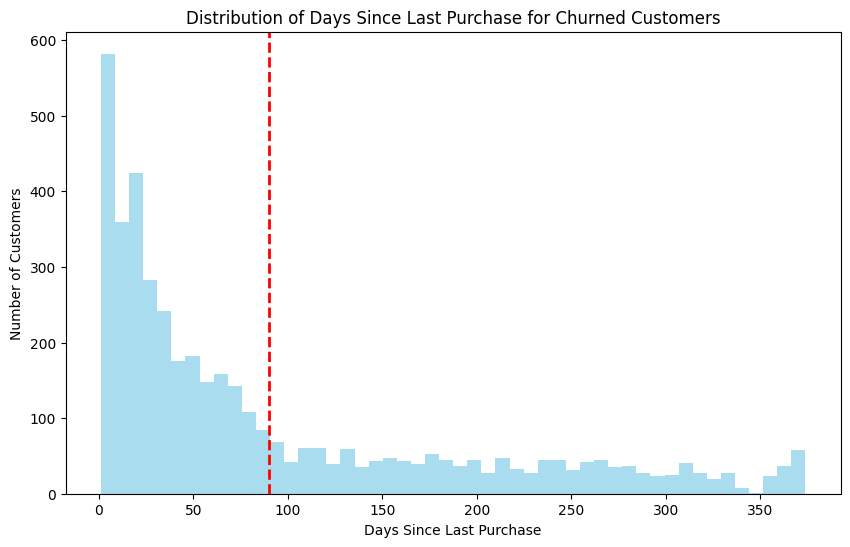

In [49]:
print("Number of Churned Customers: ",len(churned_customers))
plt.figure(figsize=(10, 6))
plt.hist(customer_last_purchase, bins=50, color='skyblue', alpha=0.7)
plt.axvline(churn_threshold, color='red', linestyle='dashed', linewidth=2)
plt.title('Distribution of Days Since Last Purchase for Churned Customers')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Number of Customers')
plt.show()

In [50]:

import pandas as pd
import time
stime = time.time()

print(f"[{pd.__name__}] total time taken: {time.time() - stime} sec")


[pandas] total time taken: 4.029273986816406e-05 sec
